In [3]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Задание 1 

## Крестики-нолики

In [273]:
with open('Tic_tac_toe.txt', 'r') as file:
    lines = file.readlines()
X = []
y = []
for line in lines:
    el = line.strip().split(',')
    features = el[:-1]
    label = el[-1]
    X.append(features)
    y.append(label)
encoder = OneHotEncoder()
X = np.array(X)
X = encoder.fit_transform(X)
y = np.array(y)

In [274]:
acc = []
test_coef = np.arange(0.011, 0.5, 0.01)
for value in test_coef:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=value, random_state=35)
    knn = KNeighborsClassifier(n_neighbors=round(np.sqrt(y_train.size)))
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Точность предсказания')

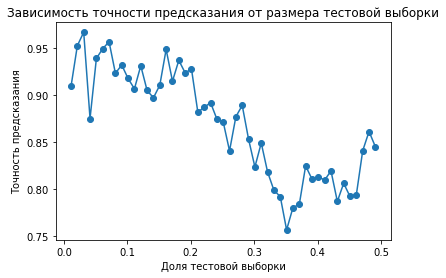

In [275]:
plt.plot(test_coef, acc, marker='o', linestyle='-')
plt.title('Зависимость точности предсказания от размера тестовой выборки')
plt.xlabel('Доля тестовой выборки')
plt.ylabel('Точность предсказания')

## e-mail спам

In [276]:
from sklearn.datasets import fetch_openml

In [277]:
data = fetch_openml(data_id=44)
X = data.data
y = data.target

In [278]:
acc = []
test_coef = np.arange(0.01, 0.5, 0.01)
for value in test_coef:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=value, random_state=35)
    knn = KNeighborsClassifier(n_neighbors=round(np.sqrt(y_train.size)))
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Точность предсказания')

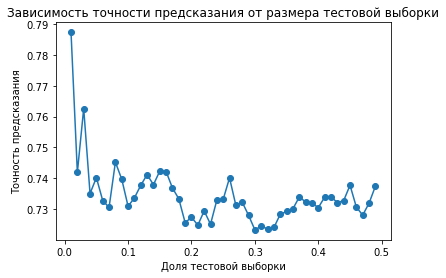

In [279]:
plt.plot(test_coef, acc, marker='o', linestyle='-')
plt.title('Зависимость точности предсказания от размера тестовой выборки')
plt.xlabel('Доля тестовой выборки')
plt.ylabel('Точность предсказания')

# Задание 2

In [5]:
import pandas as pd

In [281]:
X = pd.read_csv("glass.csv")
y = X["Type"]
X.drop(columns=["Type"], inplace=True)

In [282]:
acc = []
test_coef = np.arange(3, 73, 7)
for value in test_coef:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)
    knn = KNeighborsClassifier(n_neighbors=value)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Точность предсказания')

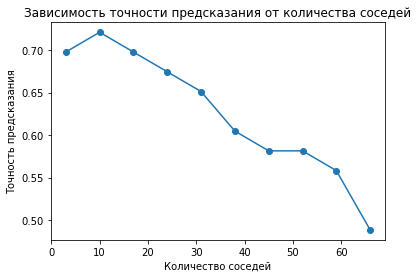

In [283]:
plt.plot(test_coef, acc, marker='o', linestyle='-')
plt.title('Зависимость точности предсказания от количества соседей')
plt.xlabel('Количество соседей')
plt.ylabel('Точность предсказания')

In [284]:
acc = []
metrics = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'euclidean', 'minkowski', 'sqeuclidean', 'l1', 'l2', 'manhattan']
for metric in metrics:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)
    knn = KNeighborsClassifier(n_neighbors=10, metric = metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

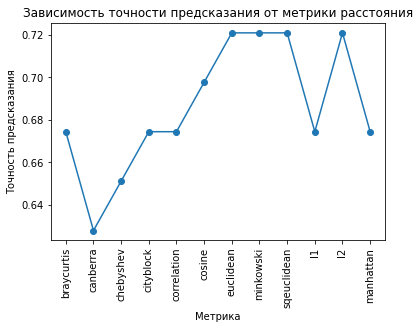

In [285]:
plt.plot(metrics, acc, marker='o', linestyle='-')
plt.title('Зависимость точности предсказания от метрики расстояния')
plt.xlabel('Метрика')
plt.ylabel('Точность предсказания')
plt.xticks(rotation='vertical')

In [286]:
acc = []
kernels = ['uniform', 'distance']
for kernel in kernels:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)
    knn = KNeighborsClassifier(n_neighbors=10, weights = kernel)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Точность предсказания')

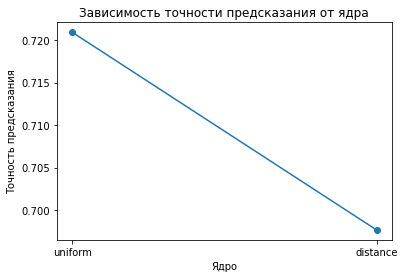

In [287]:
plt.plot(kernels, acc, marker='o', linestyle='-')
plt.title('Зависимость точности предсказания от ядра')
plt.xlabel('Ядро')
plt.ylabel('Точность предсказания')

In [288]:
new_glass = np.array([1.516, 11.7, 1.01, 1.19, 72.59, 0.43, 11.44, 0.02, 0.1]).reshape(1,-1)
y_pred = knn.predict(new_glass)
print('RI = 1.516 Na = 11.7 Mg = 1.01 Al = 1.19 Si = 72.59 K = 0.43 Ca = 11.44 Ba = 0.02 Fe = 0.1 относится к классу номер: ', y_pred)

RI = 1.516 Na = 11.7 Mg = 1.01 Al = 1.19 Si = 72.59 K = 0.43 Ca = 11.44 Ba = 0.02 Fe = 0.1 относится к классу номер:  [5]


C:\Users\semen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score_with_all_columns = accuracy_score(y_test, y_pred)

In [290]:
train_without_target = X
columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
score_without_column = []
for column in columns:
    train_without_target = train_without_target.drop(column, axis=1)
    X_train, X_test, y_train, y_test = train_test_split(train_without_target, y, test_size=0.2, random_state=35)
    knn = KNeighborsClassifier(n_neighbors=10)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score_without_column.append(score_with_all_columns - accuracy_score(y_test, y_pred))
    train_without_target = X

Text(0, 0.5, 'Разность')

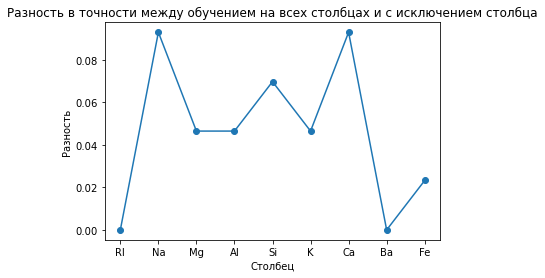

In [299]:
plt.plot(columns, score_without_column, marker='o', linestyle='-')
plt.title('Разность в точности между обучением на всех столбцах и с исключением столбца')
plt.xlabel('Столбец')
plt.ylabel('Разность')

# Задание 3

In [6]:
train_data = pd.read_csv("svmdata4.txt", delimiter="\t")
test_data = pd.read_csv("svmdata4test.txt", delimiter="\t")
X_train = train_data[["X1", "X2"]]
y_train = train_data["Colors"]
X_test = test_data[["X1", "X2"]]
y_test = test_data["Colors"]

In [7]:
acc = []
test_coef = np.arange(3, 61, 2)
for value in test_coef:
    knn = KNeighborsClassifier(n_neighbors=value)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Точность предсказания')

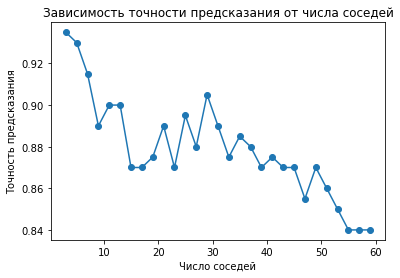

In [8]:
plt.plot(test_coef, acc, marker='o', linestyle='-')
plt.title('Зависимость точности предсказания от числа соседей')
plt.xlabel('Число соседей')
plt.ylabel('Точность предсказания')

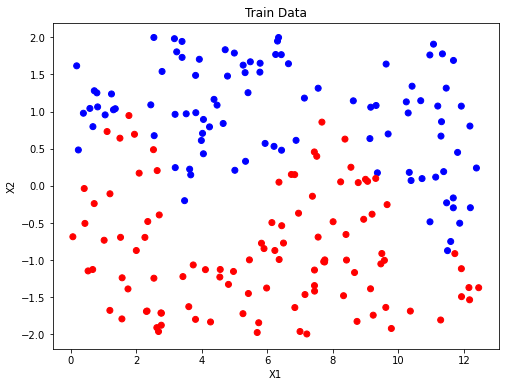

In [9]:
plt.figure(figsize=(8, 6))
colors = np.where(y_train == 'red', 'red', 'blue')
plt.scatter(train_data["X1"], train_data["X2"], c=colors)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Train Data")
plt.show()

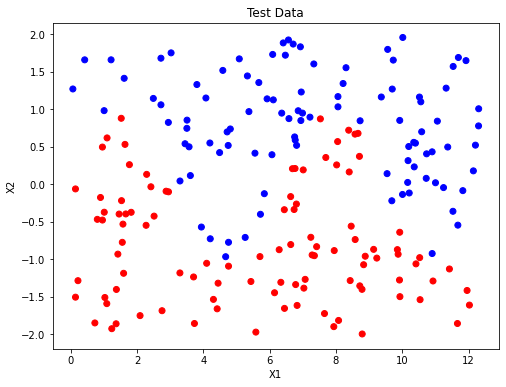

In [10]:
plt.figure(figsize=(8, 6))
colors = np.where(y_test == 'red', 'red', 'blue')
plt.scatter(test_data["X1"], test_data["X2"], c=colors)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Test Data")
plt.show()

# Задание 4

In [295]:
import pandas as pd

In [296]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.drop(columns=["Name", "Ticket", "Cabin", "PassengerId"], inplace=True)
test.drop(columns=["Name", "Ticket", "Cabin", "PassengerId"], inplace=True)

In [297]:
label_encoders = {}
categorical_features = ["Sex", "Embarked"]
for feature in categorical_features:
    le = LabelEncoder()
    train[feature] = le.fit_transform(train[feature])
    test[feature] = le.fit_transform(test[feature])
    label_encoders[feature] = le
y_train = train['Survived']
train = train.drop('Survived', axis=1)
train["Age"].fillna(train["Age"].mean(), inplace=True)
train["Fare"].fillna(train["Fare"].mean(), inplace=True)
train["Embarked"].fillna(train["Embarked"].mode()[0], inplace=True)
test["Age"].fillna(test["Age"].mean(), inplace=True)
test["Fare"].fillna(test["Fare"].mean(), inplace=True)
test["Embarked"].fillna(test["Embarked"].mode()[0], inplace=True)

In [298]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(train, y_train)
y_pred = knn.predict(test)
print("Количество выживших: ", y_pred.sum())

Количество выживших:  128
